In [5]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
import tweepy
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [6]:
consumer_key = 'L7dZDpDE85MYRkMdn6LRjgDpI'
consumer_secret = 'jYIJ3lufB11CeECmBUVqqS76BjXrQuYedeRqRTBq6p5uUcTsmP'
access_token = '43551104-zNapT000CHIlZAco7sMhO8FcOABi1jrF1JO6cR980'
access_token_secret = 'zRktl7Woy8ElULp8FSQq8DBw4gn81s9sKhRy4rhOjPptH'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [7]:
 #Se pregunta por la palabra a preguntar
palabra = input("Buscar: ")

In [8]:
numero_de_Tweets = int(input(u"Número de tweets a capturar: "))

In [9]:
 #Se define el idioma de los tweets a analizar
lenguaje = input("Idioma [es/en]:")

In [10]:
def ObtenerTweets(palabra="Trump",times=100,leguanje="en"):
    #Se define las listas que capturan la popularidad
    popularidad_list = []
    numeros_list = []
    numero = 1
    for tweet in tweepy.Cursor(api.search, palabra, lang=lenguaje).items(numero_de_Tweets):
        try:
            #Se toma el texto, se hace el analisis de sentimiento
            #y se agrega el resultado a las listas
            analisis = TextBlob(tweet.text)
            analisis = analisis.sentiment
            popularidad = analisis.polarity
            popularidad_list.append(popularidad)
            numeros_list.append(numero)
            numero = numero + 1

        except tweepy.TweepError as e:
            print(e.reason)

        except StopIteration:
            break
    return (numeros_list,popularidad_list,numero)

In [12]:
def GraficarDatos(numeros_list,popularidad_list,numero):
    axes = plt.gca()
    axes.set_ylim([-1, 2])
    
    plt.scatter(numeros_list, popularidad_list)
    popularidadPromedio = (sum(popularidad_list))/(len(popularidad_list))
    popularidadPromedio = "{0:.0f}%".format(popularidadPromedio * 100)
    time  = datetime.now().strftime("A : %H:%M\n El: %m-%d-%y")
    plt.text(0, 1.25, 
             "Sentimiento promedio:  " + str(popularidadPromedio) + "\n" + time, 
             fontsize=12, 
             bbox = dict(facecolor='none', 
                         edgecolor='black', 
                         boxstyle='square, pad = 1'))
    
    plt.title("Sentimientos sobre " + palabra + " en twitter")
    plt.xlabel("Numero de tweets")
    plt.ylabel("Sentimiento")
    plt.show()

In [13]:
numeros_list,popularidad_list,numero = ObtenerTweets(palabra,numero_de_Tweets,lenguaje)

In [17]:
numero

101

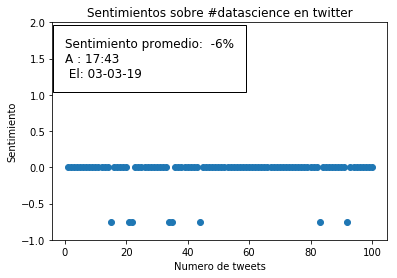

In [14]:
GraficarDatos(numeros_list,popularidad_list,numero)

In [14]:
import TextBlob

ModuleNotFoundError: No module named 'TextBlob'

In [15]:
!pip install TextBlob

    100% |████████████████████████████████| 645kB 862kB/s 
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
